In [1]:
#import relevant librarys
import numpy as np
import pandas as pd
import math
import csv
import re
import matplotlib.pyplot as pp
import seaborn
import urllib.request
import datetime as dt
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
def parsefile(filename):
    return pd.read_csv(filename, sep=',', header=0)

In [3]:
filelist = ["AdaData.csv", "climateDataOnline.csv", "PiermontPierHydrological.csv" ,"PiermontPierMeteorological.csv"]

In [4]:
#headers for timestamps and temp data from each file
ts = ["TimeStamp", "DATE", "LOCAL", "LOCAL"]
tempdata = ["Temp", "HOURLYDRYBULBTEMPC", "Fahrenheit", "Fahrenheit"]

In [5]:
#set a value for acceptable difference in timestamps
timeDifference = dt.timedelta(minutes=5)

In [6]:
datasets = []
for item in filelist:
    datasets.append(parsefile(item))

C:\Users\KeeleyLD\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (10,11,12,13,14,15,16,20,23,25,72) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [7]:
comparison = pd.DataFrame(columns=["TimeStamp","Ada","NCDCClimateData", "HRECOSPiermontH", "HRECOSPiermontM"])

In [8]:
#extract ADA data in 1 hour increments
tmpTimes = datasets[0].TimeStamp
tmpData = datasets[0].Temp
ind = []
for i, v in enumerate(tmpTimes):
    if (re.search(':00:00$', v)):
        ind.append(i)
comparison.TimeStamp = tmpTimes[ind]
comparison.Ada = tmpData[ind]
comparison = comparison.reset_index(drop=True)

In [9]:
def formatTimes(list):
    newList = []
    for item in list:
        newList.append(formatTime(item))
    return newList
def formatTime(time):
    try:
        return dt.datetime.strptime(time, '%Y-%m-%d %H:%M:%S')
    except:
        pass
    try:
        return dt.datetime.strptime(time, '%Y-%m-%d %H:%M')
    except:
        pass
    try:
        m = time.split(" ")
        o = m[1].split(":")
        if (len(o[0]) < 2):
            o[0] = "0" + o[0]
        t = ""
        for i in o:
            t = t + ":" + i
        m[1] = t[1:]
        p = m[0].split("/")
        if(len(p[0])<2):
            p[0] = "0" + p[0]
        if(len(p[1])<2):
            p[1] = "0" + p[1]
        w = ""
        for i in p:
            w = w + "/" + i
        m[0] = w[1:]
        v = ""
        for i in m:
            v = v + " " + i
        time = v[1:]
        return dt.datetime.strptime(time, '%m/%d/%Y %H:%M')
    except:
        pass

In [10]:
comparison.TimeStamp = formatTimes(comparison.TimeStamp)

In [11]:
def searchTimes(index):
    timeList = formatTimes(datasets[index][ts[index]])
    ind = []
    i = 0
    for item in comparison.TimeStamp:
        i = i+1
        x = False
        for j, item1 in enumerate(timeList):
            if(abs(item-item1) < timeDifference):
                ind.append(j)
                x = True
                break;
        if(not x):
            ind.append(float('nan'))
    return ind

In [12]:
def FtoC(f):
    return (f-32)*(5/9)

In [13]:
def num(x):
    try:
        return float(x)
    except:
        return float('nan')

In [14]:
index = 1
k = searchTimes(index)
tmp = datasets[index][tempdata[index]]
newtmp = []
for item in tmp[k]:
    newtmp.append(num(item))
comparison.NCDCClimateData = newtmp

In [15]:
index = 2
k = searchTimes(index)
tmp = datasets[index][tempdata[index]]
newtmp = []
for item in tmp[k]:
    newtmp.append(item)
nt = []
for i in newtmp:
    nt.append(FtoC(i))
comparison.HRECOSPiermontH = nt
comparison

,TimeStamp,Ada,NCDCClimateData,HRECOSPiermontH,HRECOSPiermontM
0,2018-09-19 12:00:00,22.30,25.0,25.211115,NaN
1,2018-09-19 11:00:00,22.22,25.0,24.961115,NaN
2,2018-09-19 10:00:00,22.16,25.6,24.844448,NaN
3,2018-09-19 09:00:00,22.22,23.9,24.944448,NaN
4,2018-09-19 08:00:00,22.17,22.8,24.700004,NaN
5,2018-09-19 07:00:00,22.28,20.6,24.938892,NaN
6,2018-09-19 06:00:00,22.23,19.4,24.566670,NaN
7,2018-09-19 05:00:00,22.28,20.0,24.488892,NaN
8,2018-09-19 04:00:00,22.25,20.0,24.416670,NaN
9,2018-09-19 03:00:00,22.23,20.6,24.388892,NaN


In [16]:
index = 3
k = searchTimes(index)
tmp = datasets[index][tempdata[index]]
newtmp = []
for item in tmp[k]:
    newtmp.append(item)
nt = []
for i in newtmp:
    nt.append(FtoC(i))
comparison.HRECOSPiermontM = nt
comparison

,TimeStamp,Ada,NCDCClimateData,HRECOSPiermontH,HRECOSPiermontM
0,2018-09-19 12:00:00,22.30,25.0,25.211115,24.798
1,2018-09-19 11:00:00,22.22,25.0,24.961115,24.339
2,2018-09-19 10:00:00,22.16,25.6,24.844448,23.184
3,2018-09-19 09:00:00,22.22,23.9,24.944448,22.561
4,2018-09-19 08:00:00,22.17,22.8,24.700004,22.417
5,2018-09-19 07:00:00,22.28,20.6,24.938892,22.250
6,2018-09-19 06:00:00,22.23,19.4,24.566670,22.633
7,2018-09-19 05:00:00,22.28,20.0,24.488892,22.872
8,2018-09-19 04:00:00,22.25,20.0,24.416670,22.489
9,2018-09-19 03:00:00,22.23,20.6,24.388892,23.016


In [17]:
comparison.to_csv('comparisons.csv')

In [18]:
#clean data
def clean(data):
    for i, item in enumerate(data.Ada):
        if (item == 404404.00):
            data = data.drop(i, axis=0)
    for i, item in enumerate(data.NCDCClimateData):
        if (item > 40 or item < -10):
            data = data.drop(i, axis=0)
    for i, item in enumerate(data.HRECOSPiermontH):
        if (item > 40 or item < -10):
            data = data.drop(i, axis=0)
    for i, item in enumerate(data.HRECOSPiermontM):
        if (item > 40 or item < -10):
            data = data.drop(i, axis=0)
    return data
comparison = clean(comparison)

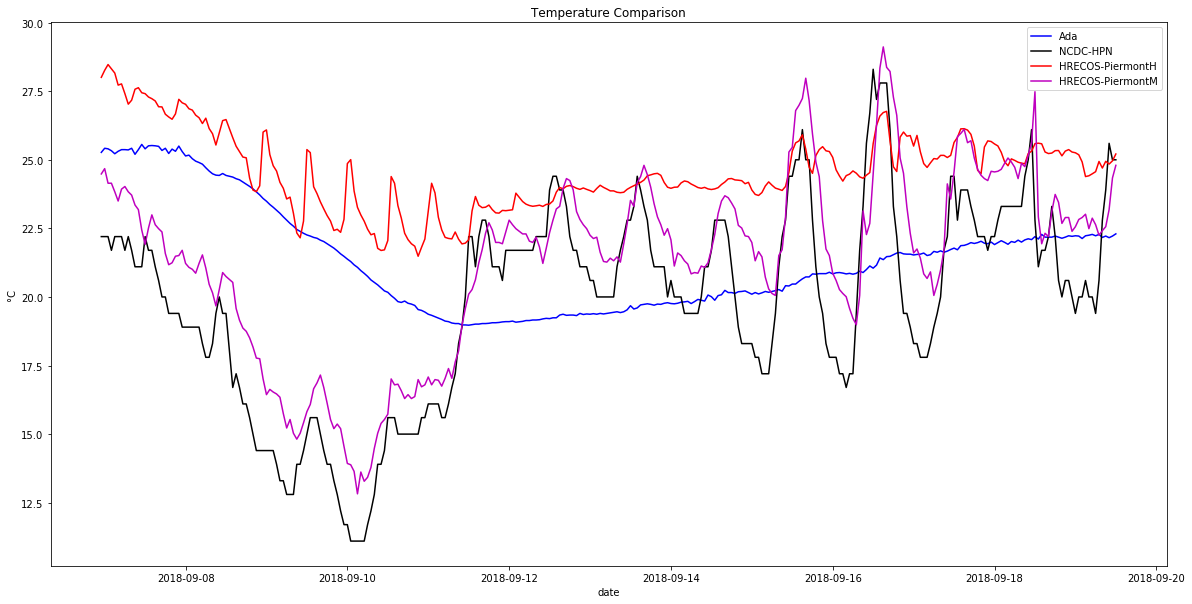

In [31]:
y = 300
pp.figure(figsize=(20,10))
pp.plot(comparison.TimeStamp[:y], comparison.Ada[:y], 'b')
pp.plot(comparison.TimeStamp[:y], comparison.NCDCClimateData[:y], 'k')
pp.plot(comparison.TimeStamp[:y], comparison.HRECOSPiermontH[:y], 'r')
pp.plot(comparison.TimeStamp[:y], comparison.HRECOSPiermontM[:y], 'm')
pp.title('Temperature Comparison')
pp.ylabel('°C')
pp.xlabel('date')
pp.legend(['Ada', 'NCDC-HPN', 'HRECOS-PiermontH','HRECOS-PiermontM'])

In [34]:
difference = []
for i, item in enumerate(comparison.Ada):
    difference.append(abs(comparison.HRECOSPiermontH.iloc[i]-item))

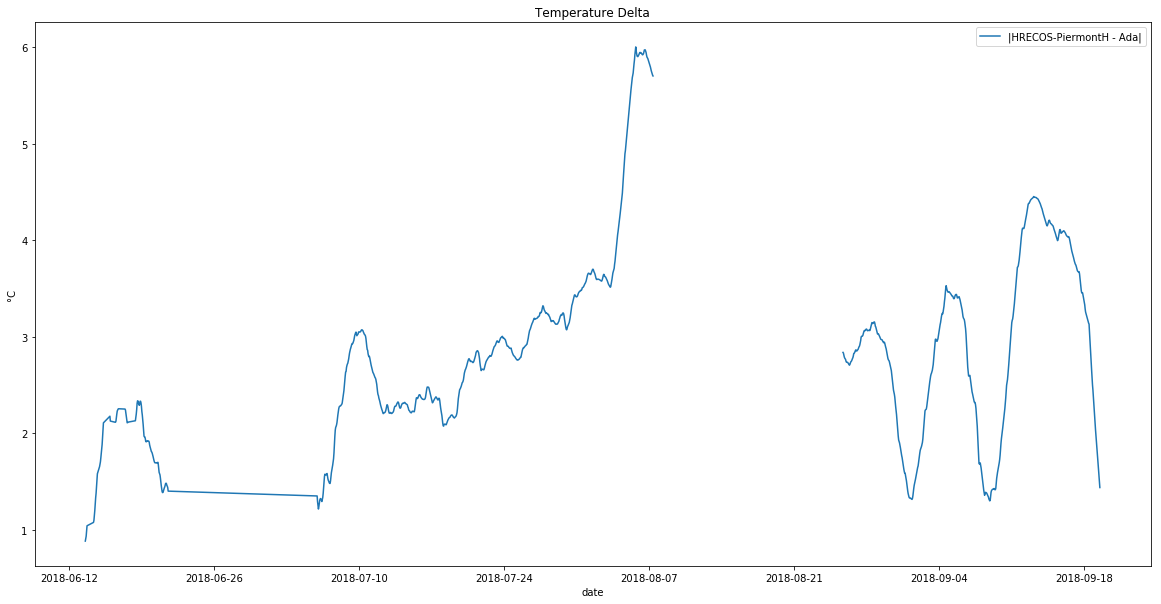

In [36]:
#function to smooth out a plot
win=50
smoothed = np.correlate(difference,np.ones(win)/win,'same')
pp.figure(figsize=(20,10))
pp.plot(comparison.TimeStamp,smoothed)
pp.title('Temperature Delta')
pp.ylabel('°C')
pp.xlabel('date')
pp.legend(['|HRECOS-PiermontH - Ada|'])

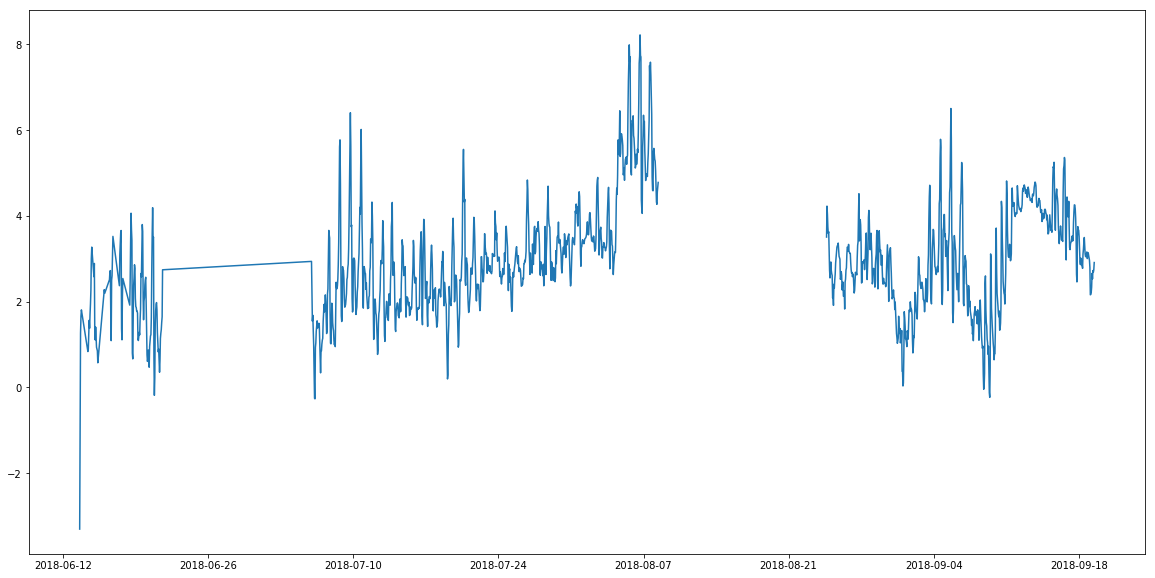

In [22]:
pp.figure(figsize=(20,10))
pp.plot(comparison.TimeStamp,difference)

Text(0.5,0,'date')

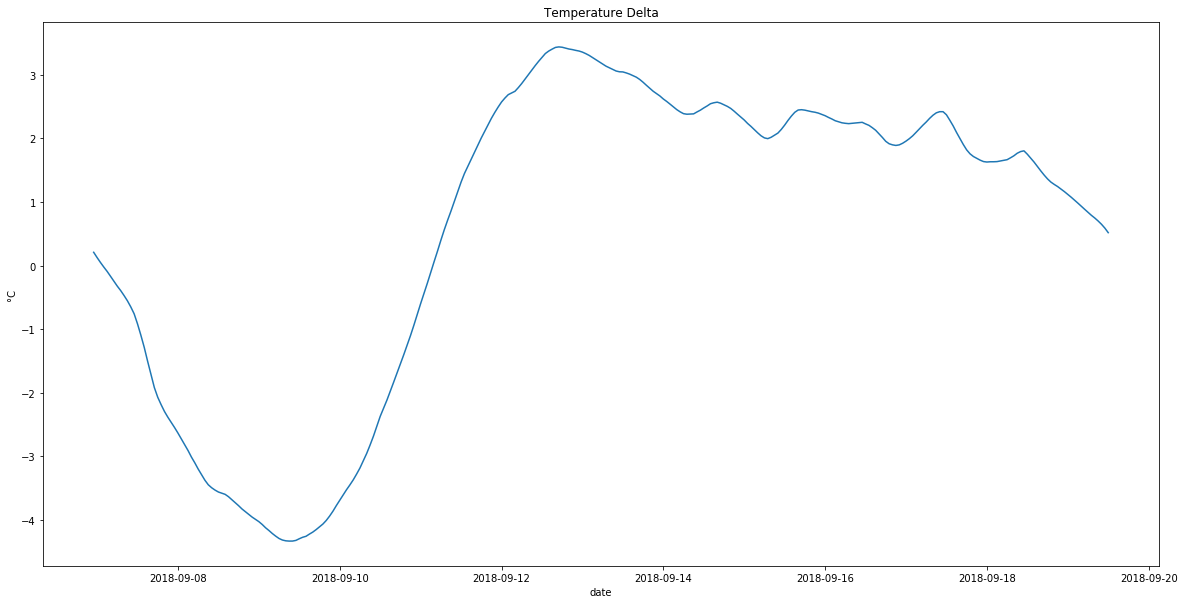

In [32]:
y = 300
difference = []
for i, item in enumerate(comparison.Ada):
    x = (comparison.HRECOSPiermontH.iloc[i]+comparison.HRECOSPiermontM.iloc[i]+comparison.NCDCClimateData.iloc[i])/3
    difference.append(x-item)
#function to smooth out a plot
win=50
smoothed = np.correlate(difference,np.ones(win)/win,'same')
pp.figure(figsize=(20,10))
pp.plot(comparison.TimeStamp[:y],smoothed[:y])
pp.title('Temperature Delta')
pp.ylabel('°C')
pp.xlabel('date')
#pp.legend(['average-Ada'])

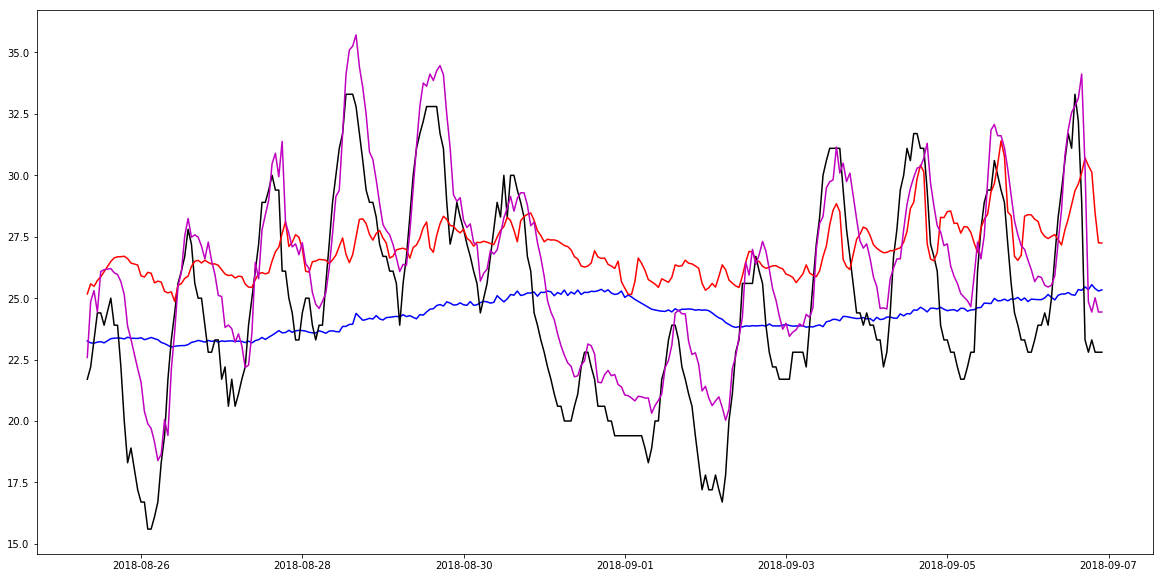

In [24]:
x = 300
y = 600
pp.figure(figsize=(20,10))
pp.plot(comparison.TimeStamp[x:y], comparison.Ada[x:y], 'b')
pp.plot(comparison.TimeStamp[x:y], comparison.NCDCClimateData[x:y], 'k')
pp.plot(comparison.TimeStamp[x:y], comparison.HRECOSPiermontH[x:y], 'r')
pp.plot(comparison.TimeStamp[x:y], comparison.HRECOSPiermontM[x:y], 'm')

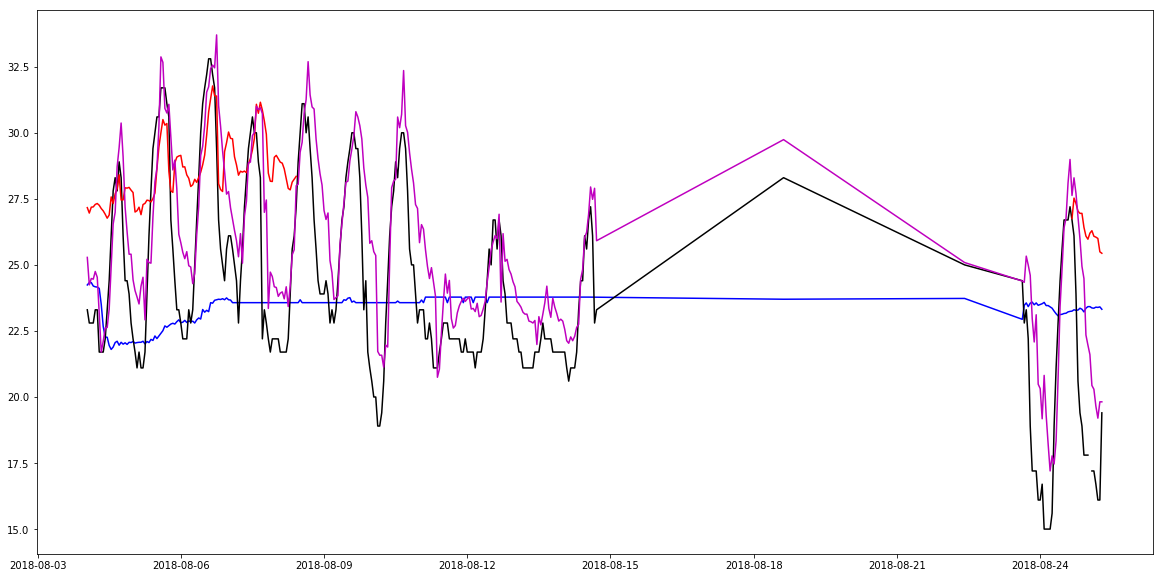

In [25]:
x = 600
y = 900
pp.figure(figsize=(20,10))
pp.plot(comparison.TimeStamp[x:y], comparison.Ada[x:y], 'b')
pp.plot(comparison.TimeStamp[x:y], comparison.NCDCClimateData[x:y], 'k')
pp.plot(comparison.TimeStamp[x:y], comparison.HRECOSPiermontH[x:y], 'r')
pp.plot(comparison.TimeStamp[x:y], comparison.HRECOSPiermontM[x:y], 'm')